In [1]:
# Imports
import numpy as np
from pathlib import Path
import importlib 
import massimal.image_render
import massimal.hyspec_io
import matplotlib.pyplot as plt
import massimal.pipeline

In [2]:
# Paths
dataset_dir = Path('C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Eksempel-datasett\\HSI\\20230830_Olberg')
raw_image_dir = dataset_dir / '0_raw'
radiance_image_dir = dataset_dir / '1_radiance'

dataset_base_name = 'massimal_larvik_olbergholmen_202308301228-south1_hsi'
radiance_image_paths = sorted(radiance_image_dir.glob('*.bip.hdr'))
irradiance_spec_paths = sorted(radiance_image_dir.glob('*.spec.hdr'))



In [3]:
print(radiance_image_paths)
print('----')
print(irradiance_spec_paths)


[WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/1_radiance/massimal_larvik_olbergholmen_202308301228-south1_hsi_005_radiance.bip.hdr'), WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/1_radiance/massimal_larvik_olbergholmen_202308301228-south1_hsi_008_radiance.bip.hdr')]
----
[WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/1_radiance/massimal_larvik_olbergholmen_202308301228-south1_hsi_005_irradiance.spec.hdr'), WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/1_radiance/massimal_larvik_olbergholmen_202308301228-south1_hsi_008_irradiance.spec.hdr')]


In [4]:
irrad_spec,irrad_wl, irrad_meta = massimal.pipeline.read_envi(irradiance_spec_paths[0])
irrad_spec = np.squeeze(irrad_spec)

In [5]:
importlib.reload(massimal.pipeline)
wl_calibrator = massimal.pipeline.WavelengthCalibrator()

In [6]:
wl_calibrator.fit(irrad_spec,irrad_wl)

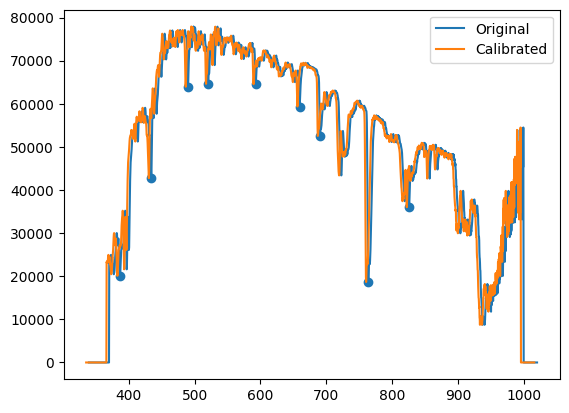

In [7]:
plt.plot(irrad_wl,irrad_spec,label='Original')
plt.scatter(irrad_wl[wl_calibrator._fh_line_indices], irrad_spec[wl_calibrator._fh_line_indices])
plt.plot(wl_calibrator.wl_cal, irrad_spec, label='Calibrated')
_ = plt.legend()

In [8]:
# Show maximum difference (sanity check)
wl_calibrator.max_wl_diff

4.224657672195065

In [9]:
importlib.reload(massimal.pipeline)
wl_calibrator = massimal.pipeline.WavelengthCalibrator()

In [10]:
wl_calibrator.fit_batch(irradiance_spec_paths)

In [11]:
# Show which spectrum was used
wl_calibrator.reference_spectrum_path

'C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Eksempel-datasett\\HSI\\20230830_Olberg\\1_radiance\\massimal_larvik_olbergholmen_202308301228-south1_hsi_005_irradiance.spec.hdr'

In [12]:
# Update header wavelengths in-place
wl_calibrator.batch_update_header_wavelengths(irradiance_spec_paths)

In [13]:
# Read spectrum again, after updating wavelengths
irrad_spec_wl_cal, irrad_wl_cal,irrad_wl_cal_meta = massimal.pipeline.read_envi(irradiance_spec_paths[0])

In [14]:
# Check that calibrator wavelengths match wavelengths read from file
np.allclose(wl_calibrator.wl_cal,irrad_wl_cal)

True